### Lookup Activity


In [0]:
@concat('SELECT control.source_ref_id,control.job_id, control.server_name, control.port, control.database_name, control.user_name, control.secret_name, control.storage_account, control.adls_url, control.container_name, control.logic_app_url, control.email_id,param.source_file_or_table_name, param.adls_file_path, param.bronze_schema, param.bronze_tbl, param.silver_schema, param.silver_tbl, param.gold_schema, param.gold_tbl FROM ',pipeline().parameters.metadata_database,'.tbl_source_control control JOIN ',pipeline().parameters.metadata_database,'.tbl_parameters param ON control.job_id = param.job_id WHERE param.job_id = ', pipeline().parameters.job_id)


### Set Variable

In [0]:
@formatDateTime(convertFromUtc(utcNow(),'India Standard Time'),'yyyy-MM-dd HH:mm:ss')

### IF activity

In [0]:
@equals(activity('Copy table records').output.rowsRead,activity('Copy table records').output.rowsCopied)

### WEB activity 
#### Pipeline In progress mail

In [0]:
{
    "to":"@{activity('metadata_lookup').output.value[0].email_id}",
    "subject":" @{concat('[',pipeline().globalParameters.env,']',pipeline().Pipeline,':[InProgress]')}",
    "email_body":"
   
    <!DOCTYPE html>
<html>
<body>
    Hi all,<br/>
    Please find below the status for @{pipeline().Pipeline}<br/><br/>
    
    <table>
        <tr>
            <th style='text-align: left;'>Parameters</th>
            <th style='text-align: left;'>Value</th>
        </tr>
        <tr>
            <td>JobID</td>
            <td>@{pipeline().parameters.job_id}</td>
        </tr>
        <tr>
            <td>Status</td>
            <td><span style='color:Red;background-color:yellow;'>In Progress</span></td>
        </tr>
        <tr>
            <td>Scheduled</td>
            <td>@{pipeline().TriggerType}</td>
        </tr>
        <tr>
            <td>LoadID</td>
            <td>@{pipeline().RunId}</td>
        </tr>
        <tr>
            <td>JobStart</td>
            <td>@{variables('start_time')}</td>
        </tr>
    </table><br/><br/><br/>
    
    <p>QtrEnergy Team.</p>
</body>
</html>
    "
}




### WEB activity 
#### Source File Copy Failed mail

In [0]:
{
    "to":"@{item().email_id}",
    "subject":" @{concat('[',pipeline().globalParameters.env,']',pipeline().Pipeline,':[Source File Copy Failed]')}",
    "email_body":"
   
    <!DOCTYPE html>
<html>
<body>
    Hi all,<br/>
    Please find below the status for @{pipeline().Pipeline}<br/><br/>
    
    <table>
        <tr>
            <th style='text-align: left;'>Parameters</th>
            <th style='text-align: left;'>Value</th>
        </tr>
        <tr>
            <td>JobID</td>
            <td>@{pipeline().parameters.job_id}</td>
        </tr>
        <tr>
            <td>Status</td>
            <td><span style='color:Red;background-color:yellow';>Failed</span></td>
        </tr>
        <tr>
            <td>Scheduled</td>
            <td>@{pipeline().TriggerType}</td>
        </tr>
        <tr>
            <td>LoadID</td>
            <td>@{pipeline().RunId}</td>
        </tr>
        <tr>
            <td>JobStart</td>
            <td>@{variables('start_time')}</td>
        </tr>
        <tr>
            <td>FileName</td>
            <td>@{item().source_file_or_table_name}</td>
        </tr>
        <tr>
            <td>Error</td>
            <td>@{activity('Copy table records').Error.message
}</td>
        </tr>
    </table><br/><br/><br/>
    
    <p>QtrEnergy team.</p>
</body>
</html>
    "
}

![testimg](files/Project_Architecture.png)

* list1
* list2

- kbkb
  - jbkb

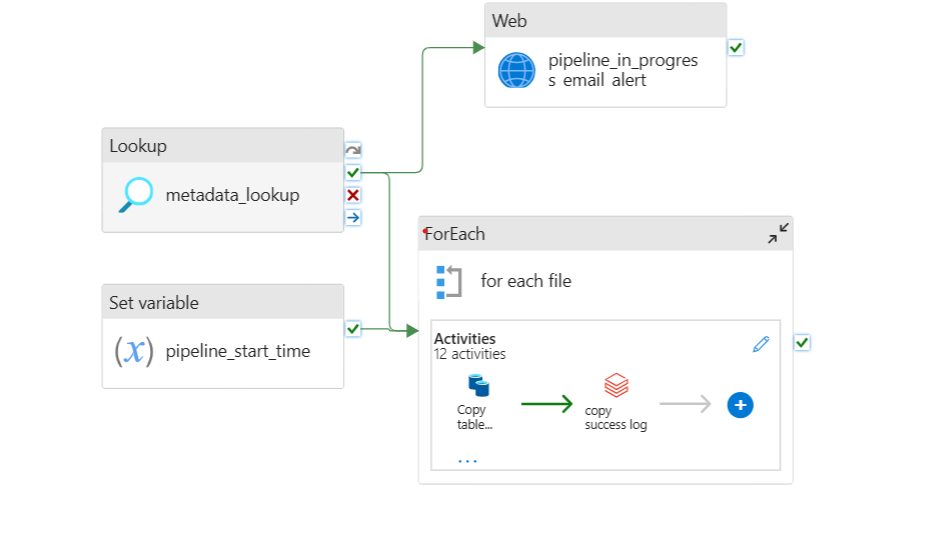

In [0]:
from IPython.display import Image, display
display(Image("https://raw.githubusercontent.com/SALAHUDDINKHAN99/Azure-data-engineering-batch-load-project/main/Images/sql%20To%20Landing%20Container%201.png"))
